# 날짜데이터를 처리 하자! 1편 (python / date time / pandas)

In [2]:
import pandas as pd

In [7]:
# 데이터 구조 파악
df1 = pd.read_csv('Data01.csv')
print(df1.shape)
df1.head()

(15000, 7)


,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [9]:
df1['날짜'] # Series 형태로 출력

0        2019-05-16
1        2019-05-16
2        2019-05-16
3        2019-05-16
4        2019-05-16
            ...    
14995    2019-08-07
14996    2019-08-07
14997    2019-08-07
14998    2019-08-07
14999    2019-08-07
Name: 날짜, Length: 15000, dtype: object

기본적으로 문자형 데이터(object)로 인식함

In [10]:
# 날짜 데이터로 변환
pd.to_datetime(df1['날짜'])

0       2019-05-16
1       2019-05-16
2       2019-05-16
3       2019-05-16
4       2019-05-16
           ...    
14995   2019-08-07
14996   2019-08-07
14997   2019-08-07
14998   2019-08-07
14999   2019-08-07
Name: 날짜, Length: 15000, dtype: datetime64[ns]

In [18]:
# 새로운'날짜_datetime' 칼럼 생성
df1['날짜_datetime'] = pd.to_datetime(df1['날짜'])

날짜 형태 데이터로 변환된 '날짜' 데이터를 '날짜_datetime'라는 컬럼으로 새로 만든다

In [19]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019


In [20]:
# dt 함수를 이용해 연도 추출
df1['날짜_datetime'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
14995    2019
14996    2019
14997    2019
14998    2019
14999    2019
Name: 날짜_datetime, Length: 15000, dtype: int64

In [21]:
# 새로운 '연도' 컬럼 생성
df1['연도'] = df1['날짜_datetime'].dt.year

In [22]:
df1.head()

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16,2019
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16,2019


In [23]:
# 연도별 2019년도 출고수량 총 합
pd.pivot_table(data=df1, index='연도', values='출고수량', aggfunc='sum')

,출고수량
연도,
2019,108078


In [24]:
# 연도별 2019년도 출고수량, 입고수량 총 합
pd.pivot_table(data=df1, index='연도', values=['출고수량', '입고수량'], aggfunc='sum')

,입고수량,출고수량
연도,,
2019,872168,108078


In [30]:
# 새로운 '월', '주차', '일자', '요일' 컬럼 생성
df1['월'] = df1['날짜_datetime'].dt.month
df1['주차'] = df1['날짜_datetime'].dt.isocalendar().week
df1['일자'] = df1['날짜_datetime'].dt.day
df1['요일'] = df1['날짜_datetime'].dt.day_name()

In [28]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도,월,주차,일자,요일
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,20,16,Thursday
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,20,16,Thursday


In [39]:
# 월별 카테코리별 2019년도 출고수량 총합 계산_데이터 재구조화(pivot_table 사용)
pd.pivot_table(data=df1, index='월', columns = '카테고리', values = '출고수량', aggfunc='sum')

카테고리,F&B,ST,기타,덴탈케어,매입브랜드,세탁세제,주방세제,헤어케어
월,,,,,,,,
5,1248,95,144,2788,69,8579,2872,3632
6,2021,240,221,5806,115,16732,6647,7615
7,2193,300,206,6112,80,17938,7270,6485
8,316,56,50,1094,16,4021,1271,1846


In [38]:
# 월별 2019년도 출고수량 총합 계산_데이터 재구조화(pivot_table 사용)
pd.pivot_table(data=df1, index='월', values = '출고수량', aggfunc='sum')

,출고수량
월,
5,19427
6,39397
7,40584
8,8670


pd.pivot_table(**data**, **index**, **columns**, **values**, **aggfunc**)

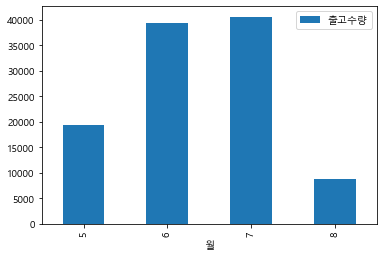

In [37]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
pd.pivot_table(data=df1, index='월', values = '출고수량', aggfunc='sum').plot(kind='bar');

* df['Birth_date']       = df['Birth'].dt.date         # YYYY-MM-DD(문자)  
* df['Birth_year']       = df['Birth'].dt.year         # 연(4자리숫자)  
* df['Birth_month']      = df['Birth'].dt.month        # 월(숫자)  
* df['Birth_month_name'] = df['Birth'].dt.month_name() # 월(문자)  

* df['Birth_day']        = df['Birth'].dt.day          # 일(숫자)  
* df['Birth_time']       = df['Birth'].dt.time         # HH:MM:SS(문자)  
* df['Birth_hour']       = df['Birth'].dt.hour         # 시(숫자)  
* df['Birth_minute']     = df['Birth'].dt.minute       # 분(숫자)  
* df['Birth_second']     = df['Birth'].dt.second       # 초(숫자)